<a href="https://colab.research.google.com/github/talesoverfables/NetShield/blob/main/models/GCN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install torch-geometric

In [10]:
import os
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, Dataset, DataLoader
from torch_geometric.nn import GCNConv
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import networkx as nx
from tqdm import tqdm

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



Step 3: Setting up file paths...
Dataset path: /content/drive/MyDrive/Dataset-Smruthi/
Looking for files: ['IoT_Fridge.csv', 'IoT_Garage_Door.csv', 'IoT_GPS_Tracker.csv', 'IoT_Modbus.csv', 'IoT_Motion_Light.csv', 'IoT_Thermostat.csv', 'IoT_Weather.csv']

Step 4: Loading datasets...
Loaded IoT_Fridge with shape: (587076, 6)

Sample data from IoT_Fridge:
        date            time  fridge_temperature temp_condition  label    type
0  31-Mar-19     12:36:52                  13.10          high       0  normal
1  31-Mar-19     12:36:53                   8.65          high       0  normal
2  31-Mar-19     12:36:54                   2.00           low       0  normal
3  31-Mar-19     12:36:55                   4.80           low       0  normal
4  31-Mar-19     12:36:56                  10.70          high       0  normal

Column information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 587076 entries, 0 to 587075
Data columns (total 6 columns):
 #   Column              Non-Null Count

<ipython-input-12-a4916932d5dc>:109: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)


  Features: ['light_status', 'pressure', 'humidity', 'thermostat_status', 'longitude', 'FC2_Read_Discrete_Value', 'current_temperature', 'sphone_signal', 'latitude', 'FC3_Read_Holding_Register', 'temp_condition', 'FC4_Read_Coil', 'temperature', 'FC1_Read_Input_Register', 'fridge_temperature', 'door_state', 'motion_status']
  Feature shape: (587076, 17)
  Label distribution: [500827  86249]
  Attack types: ['backdoor' 'ddos' 'injection' 'normal' 'password' 'ransomware' 'xss']
Processing IoT_Garage_Door...
  Adding missing feature 'light_status' to IoT_Garage_Door
  Adding missing feature 'pressure' to IoT_Garage_Door
  Adding missing feature 'humidity' to IoT_Garage_Door
  Adding missing feature 'thermostat_status' to IoT_Garage_Door
  Adding missing feature 'longitude' to IoT_Garage_Door
  Adding missing feature 'FC2_Read_Discrete_Value' to IoT_Garage_Door
  Adding missing feature 'current_temperature' to IoT_Garage_Door
  Adding missing feature 'latitude' to IoT_Garage_Door
  Adding m

<ipython-input-12-a4916932d5dc>:109: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)


  Features: ['light_status', 'pressure', 'humidity', 'thermostat_status', 'longitude', 'FC2_Read_Discrete_Value', 'current_temperature', 'sphone_signal', 'latitude', 'FC3_Read_Holding_Register', 'temp_condition', 'FC4_Read_Coil', 'temperature', 'FC1_Read_Input_Register', 'fridge_temperature', 'door_state', 'motion_status']
  Feature shape: (591446, 17)
  Label distribution: [515443  76003]
  Attack types: ['backdoor' 'ddos' 'injection' 'normal' 'password' 'ransomware' 'scanning'
 'xss']
Processing IoT_GPS_Tracker...
  Adding missing feature 'light_status' to IoT_GPS_Tracker
  Adding missing feature 'pressure' to IoT_GPS_Tracker
  Adding missing feature 'humidity' to IoT_GPS_Tracker
  Adding missing feature 'thermostat_status' to IoT_GPS_Tracker
  Adding missing feature 'FC2_Read_Discrete_Value' to IoT_GPS_Tracker
  Adding missing feature 'current_temperature' to IoT_GPS_Tracker
  Adding missing feature 'sphone_signal' to IoT_GPS_Tracker
  Adding missing feature 'FC3_Read_Holding_Regist

<ipython-input-12-a4916932d5dc>:109: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)


  Features: ['light_status', 'pressure', 'humidity', 'thermostat_status', 'longitude', 'FC2_Read_Discrete_Value', 'current_temperature', 'sphone_signal', 'latitude', 'FC3_Read_Holding_Register', 'temp_condition', 'FC4_Read_Coil', 'temperature', 'FC1_Read_Input_Register', 'fridge_temperature', 'door_state', 'motion_status']
  Feature shape: (452262, 17)
  Label distribution: [388328  63934]
  Attack types: ['backdoor' 'ddos' 'injection' 'normal' 'password' 'ransomware' 'scanning'
 'xss']
Processing IoT_Thermostat...
  Adding missing feature 'light_status' to IoT_Thermostat
  Adding missing feature 'pressure' to IoT_Thermostat
  Adding missing feature 'humidity' to IoT_Thermostat
  Adding missing feature 'longitude' to IoT_Thermostat
  Adding missing feature 'FC2_Read_Discrete_Value' to IoT_Thermostat
  Adding missing feature 'sphone_signal' to IoT_Thermostat
  Adding missing feature 'latitude' to IoT_Thermostat
  Adding missing feature 'FC3_Read_Holding_Register' to IoT_Thermostat
  Add

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion matrix saved as 'confusion_matrix.png'
Training curves saved as 'training_curves.png'

Network Intrusion Detection with GCN completed successfully!


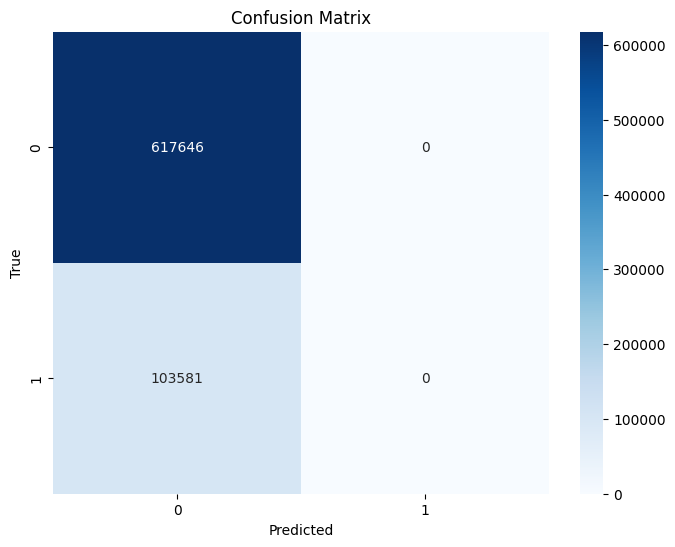

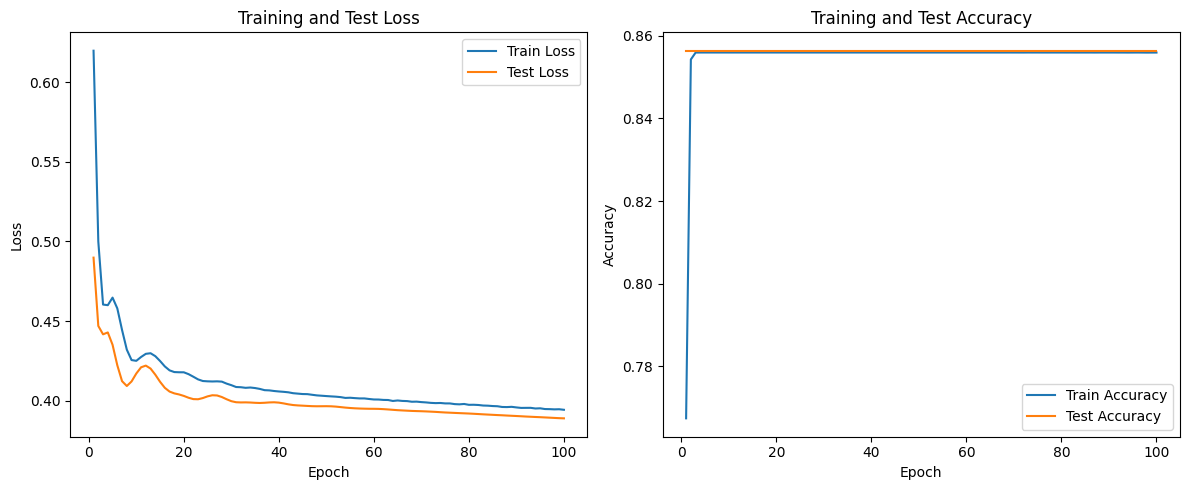

In [12]:
print("\nStep 3: Setting up file paths...")
base_path = '/content/drive/MyDrive/Dataset-Smruthi/'
dataset_files = [
    'IoT_Fridge.csv',
    'IoT_Garage_Door.csv',
    'IoT_GPS_Tracker.csv',
    'IoT_Modbus.csv',
    'IoT_Motion_Light.csv',
    'IoT_Thermostat.csv',
    'IoT_Weather.csv'
]
print(f"Dataset path: {base_path}")
print(f"Looking for files: {dataset_files}")

# Step 4: Load and preprocess each dataset
print("\nStep 4: Loading datasets...")
datasets = {}
common_features = None

for file in dataset_files:
    device_name = file.replace('.csv', '')
    file_path = os.path.join(base_path, file)

    try:
        # Load the dataset
        df = pd.read_csv(file_path, low_memory=False)  # Added low_memory=False to avoid DtypeWarning
        print(f"Loaded {device_name} with shape: {df.shape}")

        # Display first few rows and column info for first dataset only
        if len(datasets) == 0:
            print(f"\nSample data from {device_name}:")
            print(df.head())
            print("\nColumn information:")
            print(df.info())

        # Convert date and time to datetime and create a timestamp feature
        if 'date' in df.columns and 'time' in df.columns:
            # Specify format to avoid warning
            df['timestamp'] = pd.to_datetime(df['date'] + ' ' + df['time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

        # Store the preprocessed dataset
        datasets[device_name] = df

        # Identify potential numerical features
        potential_features = [col for col in df.columns if col not in ['date', 'time', 'timestamp', 'label', 'type']]

        # Initialize common_features with first dataset's features
        if common_features is None:
            common_features = set(potential_features)
        else:
            # Find intersection of features across all datasets
            common_features = common_features.intersection(set(potential_features))

    except Exception as e:
        print(f"Error loading {file}: {e}")

print(f"Loaded {len(datasets)} datasets successfully.")
print(f"Common features across all datasets: {common_features}")

# If no common features found, we need to handle differently
if not common_features:
    print("Warning: No common numerical features found across all datasets.")
    print("Will use one-hot encoding for categorical features and include all numerical features.")

    # Alternative approach: Create a unified feature set
    all_potential_features = set()
    for device_name, df in datasets.items():
        features = [col for col in df.columns if col not in ['date', 'time', 'timestamp', 'label', 'type']]
        all_potential_features.update(features)

    print(f"All potential features across datasets: {all_potential_features}")
    common_features = list(all_potential_features)

# Convert to list for easier handling
common_features = list(common_features)

# Step 5: Extract features and labels
print("\nStep 5: Extracting features and labels...")
all_features = []
all_labels = []
all_attack_types = []
device_indices = []
feature_names = common_features  # Using the common features

current_index = 0

# Process each device dataset
for device_name, df in datasets.items():
    print(f"Processing {device_name}...")

    # Extract labels and attack types
    labels = df['label'].values
    attack_types = df['type'].values

    # Ensure all common features exist in this dataset
    for feature in common_features:
        if feature not in df.columns:
            print(f"  Adding missing feature '{feature}' to {device_name}")
            df[feature] = 0  # Add with default value of 0

    # Convert any categorical or boolean columns to numeric
    for col in common_features:
        if df[col].dtype == bool:
            df[col] = df[col].astype(int)
        elif df[col].dtype == 'object':
            try:
                df[col] = pd.to_numeric(df[col], errors='coerce')
                # Fill NaN values with 0 after conversion
                df[col].fillna(0, inplace=True)
            except:
                print(f"  Could not convert '{col}' to numeric, one-hot encoding it")
                # One-hot encode categorical features
                dummies = pd.get_dummies(df[col], prefix=col)
                df = pd.concat([df, dummies], axis=1)
                # Update common_features to remove this column and add the new columns
                common_features.remove(col)
                common_features.extend(dummies.columns.tolist())

    # Extract features based on updated common_features
    features = df[common_features].values

    # Print feature summary
    print(f"  Features: {common_features}")
    print(f"  Feature shape: {features.shape}")
    print(f"  Label distribution: {np.bincount(labels)}")
    print(f"  Attack types: {np.unique(attack_types)}")

    # Store device indices for later use in graph construction
    n_samples = len(df)
    device_indices.append((current_index, current_index + n_samples))
    current_index += n_samples

    # Add to the combined lists
    all_features.append(features)
    all_labels.append(labels)
    all_attack_types.append(attack_types)

# Concatenate all features and labels
X = np.vstack(all_features)
y = np.concatenate(all_labels)
attack_types = np.concatenate(all_attack_types)

print(f"Combined features shape: {X.shape}")
print(f"Combined labels shape: {y.shape}")
print(f"Label distribution: {np.bincount(y)}")

# Step 6: Normalize features
print("\nStep 6: Normalizing features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(f"Features normalized. Mean: {np.mean(X_scaled):.4f}, Std: {np.std(X_scaled):.4f}")

# Step 7: Build the graph
print("\nStep 7: Building graph representation...")
def build_graph(X, y, device_indices, temporal_window=60, similarity_threshold=0.8):
    """
    Build a graph where:
    - Nodes are individual records
    - Edges connect nodes based on:
        1. Same device and close in time
        2. Similar feature patterns across devices
    """
    num_nodes = X.shape[0]
    edge_index = [[], []]  # Source, target lists

    print(f"Building graph with {num_nodes} nodes...")

    # 1. Connect nodes within the same device based on temporal proximity
    print("Creating temporal edges within devices...")
    for device_idx, (start_idx, end_idx) in enumerate(device_indices):
        device_data = X[start_idx:end_idx]
        device_size = end_idx - start_idx

        print(f"  Processing device {device_idx+1}/{len(device_indices)}, size: {device_size}")

        # Create a sample of nodes to connect (for efficiency)
        sample_size = min(5000, device_size)  # Limit sample size for large devices
        if device_size > sample_size:
            sample_indices = np.random.choice(device_size, sample_size, replace=False)
        else:
            sample_indices = np.arange(device_size)

        # Connect nodes close in time (assuming sequential data)
        edge_count = 0
        for i in sample_indices:
            # Connect with nodes within a window
            window_size = min(temporal_window, device_size - i)
            for j in range(1, window_size):
                if i+j < device_size:
                    node_i = start_idx + i
                    node_j = start_idx + i + j

                    # Add bidirectional edge
                    edge_index[0].append(node_i)
                    edge_index[1].append(node_j)
                    edge_index[0].append(node_j)
                    edge_index[1].append(node_i)
                    edge_count += 2

        print(f"  Added {edge_count} temporal edges for device {device_idx+1}")

    # 2. Connect nodes across devices based on feature similarity
    print("Creating cross-device similarity edges...")
    # For efficiency, sample nodes from each device
    inter_device_sample = 100  # Sample size per device

    sampled_nodes = []
    sampled_features = []

    for dev_idx, (start_idx, end_idx) in enumerate(device_indices):
        device_size = end_idx - start_idx
        print(f"  Sampling from device {dev_idx+1}/{len(device_indices)}")

        if device_size > inter_device_sample:
            sample_indices = np.random.choice(device_size, inter_device_sample, replace=False)
        else:
            sample_indices = np.arange(device_size)

        for idx in sample_indices:
            node_idx = start_idx + idx
            sampled_nodes.append(node_idx)
            sampled_features.append(X[node_idx])

    sampled_features = np.array(sampled_features)
    print(f"  Sampled {len(sampled_nodes)} nodes for cross-device connections")

    # Calculate cosine similarity between sampled nodes
    print("  Calculating similarities and creating edges...")
    similarity_edge_count = 0

    for i in range(len(sampled_nodes)):
        for j in range(i+1, len(sampled_nodes)):
            # Check if nodes are from different devices
            node_i_device = next(idx for idx, (start, end) in enumerate(device_indices) if start <= sampled_nodes[i] < end)
            node_j_device = next(idx for idx, (start, end) in enumerate(device_indices) if start <= sampled_nodes[j] < end)

            if node_i_device != node_j_device:
                # Calculate similarity using dot product (features are normalized)
                similarity = np.dot(sampled_features[i], sampled_features[j]) / (
                    np.linalg.norm(sampled_features[i]) * np.linalg.norm(sampled_features[j]))

                # Connect if similarity is above threshold
                if similarity > similarity_threshold:
                    edge_index[0].append(sampled_nodes[i])
                    edge_index[1].append(sampled_nodes[j])
                    edge_index[0].append(sampled_nodes[j])
                    edge_index[1].append(sampled_nodes[i])
                    similarity_edge_count += 2

    print(f"  Added {similarity_edge_count} similarity-based edges")

    # Convert edge lists to tensor
    edge_index = torch.tensor(edge_index, dtype=torch.long)

    # Create node features tensor
    x = torch.tensor(X, dtype=torch.float)

    # Create node labels tensor
    y = torch.tensor(y, dtype=torch.long)

    # Create PyG Data object
    data = Data(x=x, edge_index=edge_index, y=y)
    print(f"Graph created with {data.num_nodes} nodes and {data.num_edges} edges")

    return data

# Build the graph
data = build_graph(X_scaled, y, device_indices)

# Step 8: Define the GCN model
print("\nStep 8: Defining the GCN model...")
class GCN(torch.nn.Module):
    def __init__(self, num_features, hidden_channels, num_classes):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.linear = torch.nn.Linear(hidden_channels, num_classes)

    def forward(self, x, edge_index):
        # First Graph Convolution
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        # Second Graph Convolution
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)

        # Final linear layer
        x = self.linear(x)

        return x

# Step 9: Split data into train and test sets
print("\nStep 9: Splitting data into train and test sets...")
num_nodes = data.num_nodes
train_ratio = 0.8

# Create random indices for train/test split
indices = np.random.permutation(num_nodes)
train_size = int(num_nodes * train_ratio)

train_indices = indices[:train_size]
test_indices = indices[train_size:]

# Create train and test masks
train_mask = torch.zeros(num_nodes, dtype=torch.bool)
test_mask = torch.zeros(num_nodes, dtype=torch.bool)

train_mask[train_indices] = True
test_mask[test_indices] = True

data.train_mask = train_mask
data.test_mask = test_mask

print(f"Data split: {train_size} training nodes, {num_nodes - train_size} test nodes")

# Step 10: Set up device, model, optimizer, and loss function
print("\nStep 10: Setting up model, optimizer, and loss function...")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

model = GCN(num_features=X_scaled.shape[1], hidden_channels=64, num_classes=2)  # Binary classification
model = model.to(device)
print(f"Model created with {X_scaled.shape[1]} input features, 64 hidden units, 2 output classes")

optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()
print("Optimizer (Adam) and loss function (CrossEntropyLoss) set up.")

# Step 11: Define training and evaluation functions
print("\nStep 11: Defining training and evaluation functions...")

def train_model(model, data, optimizer, criterion, device):
    model.train()
    optimizer.zero_grad()

    # Move data to device
    x, edge_index, y = data.x.to(device), data.edge_index.to(device), data.y.to(device)

    # Forward pass
    out = model(x, edge_index)

    # Only use training nodes for loss calculation
    train_mask = data.train_mask.to(device)
    loss = criterion(out[train_mask], y[train_mask])

    # Backward pass
    loss.backward()
    optimizer.step()

    # Calculate accuracy
    pred = out[train_mask].argmax(dim=1)
    correct = (pred == y[train_mask]).sum().item()
    acc = correct / train_mask.sum().item()

    return loss.item(), acc

def evaluate_model(model, data, criterion, device, mask_type='test'):
    model.eval()

    # Move data to device
    x, edge_index, y = data.x.to(device), data.edge_index.to(device), data.y.to(device)

    with torch.no_grad():
        # Forward pass
        out = model(x, edge_index)

        # Use appropriate mask
        if mask_type == 'test':
            mask = data.test_mask.to(device)
        else:  # train
            mask = data.train_mask.to(device)

        # Calculate loss
        loss = criterion(out[mask], y[mask])

        # Get predictions
        pred = out[mask].argmax(dim=1)

        # Calculate accuracy
        correct = (pred == y[mask]).sum().item()
        accuracy = correct / mask.sum().item()

    return loss.item(), accuracy, pred.cpu().numpy(), y[mask].cpu().numpy()

# Step 12: Train the model
print("\nStep 12: Training the GCN model...")
num_epochs = 100
best_accuracy = 0

# For storing metrics
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

print(f"Starting training for {num_epochs} epochs...")
print("Epoch\tTrain Loss\tTrain Acc\tTest Loss\tTest Acc")
print("-" * 60)

for epoch in range(1, num_epochs + 1):
    # Training
    train_loss, train_acc = train_model(model, data, optimizer, criterion, device)

    # Evaluation on test set
    test_loss, test_acc, _, _ = evaluate_model(model, data, criterion, device)

    # Store metrics
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    # Print progress
    if epoch % 5 == 0 or epoch == 1:
        print(f"{epoch:3d}\t{train_loss:.4f}\t\t{train_acc:.4f}\t\t{test_loss:.4f}\t\t{test_acc:.4f}")

    # Save best model
    if test_acc > best_accuracy:
        best_accuracy = test_acc
        torch.save(model.state_dict(), 'best_gcn_model.pt')

# Step 13: Load best model and perform final evaluation
print("\nStep 13: Loading best model and performing final evaluation...")
model.load_state_dict(torch.load('best_gcn_model.pt'))

# Final evaluation on test set
test_loss, test_accuracy, test_predictions, test_true_labels = evaluate_model(model, data, criterion, device)

print(f"Final test accuracy: {test_accuracy:.4f}")
print(f"Final test loss: {test_loss:.4f}")

# Print classification report
print("\nClassification report:")
print(classification_report(test_true_labels, test_predictions))

# Step 14: Visualize results
print("\nStep 14: Visualizing results...")

# Plot confusion matrix
cm = confusion_matrix(test_true_labels, test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
print("Confusion matrix saved as 'confusion_matrix.png'")

# Plot training curves
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()

plt.tight_layout()
plt.savefig('training_curves.png')
print("Training curves saved as 'training_curves.png'")

print("\nNetwork Intrusion Detection with GCN completed successfully!")